### Read SLHA

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import glob,imp,os,shutil
from pandas.io.json import json_normalize
import pyslha
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')
pd.options.mode.chained_assignment = None #Disable copy warnings

In [2]:
slhaFolder = '../EWino/data/slha_scanRandom_Prospino'

In [3]:
#Get SLHA data:
slhaData = []
kFactors = {}
for f in glob.glob(slhaFolder+'/*.slha'):
    with open(f,'r') as ff:
        if not 'Prospino' in ff.read():
            continue
            
    slha = pyslha.readSLHAFile(f)
    
    for proc in slha.xsections.values():
        pids = tuple(sorted(proc.pidsfinal))
        if not proc.get_xsecs(sqrts=13000,qcd_order=1):
            continue
        if not proc.get_xsecs(sqrts=13000,qcd_order=0):
            continue
            
        xsecNLO = proc.get_xsecs(sqrts=13000,qcd_order=1)[0]
        xsecLO = proc.get_xsecs(sqrts=13000,qcd_order=0)[0]
        kfactor = xsecNLO.value/xsecLO.value
        mass1 = abs(slha.blocks['MASS'][abs(pids[0])])
        mass2 = abs(slha.blocks['MASS'][abs(pids[1])])
        if not pids in kFactors:
            kFactors[pids] = []
        kFactors[pids].append([mass1,mass2,kfactor])

In [4]:
print(kFactors.keys())

dict_keys([(1000022, 1000024), (-1000024, 1000024), (-1000024, 1000022), (1000022, 1000022), (1000023, 1000024), (-1000024, 1000023), (1000022, 1000023), (1000023, 1000023)])


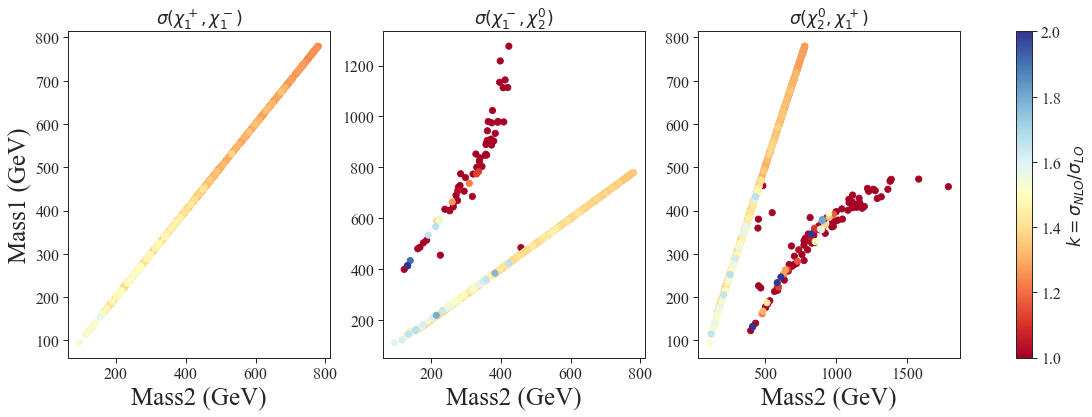

In [5]:
cm = plt.cm.get_cmap('RdYlBu')
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,6))
titles = {(-1000024, 1000024) : r'$\sigma(\chi_1^+,\chi_1^-)$',
         (-1000024, 1000023) : r'$\sigma(\chi_1^-,\chi_2^0)$',
         (1000023, 1000024) : r'$\sigma(\chi_2^0,\chi_1^+)$'}
i = 0
for pid,title in titles.items():
    ax = axes[i]
    data = np.array(kFactors[pid])
    x = data[:,0]
    y = data[:,1]
    z = data[:,2]
    x = x[z.argsort()]
    y = y[z.argsort()]
    z = z[z.argsort()]        
    a = ax.scatter(x,y,c=z,s=40,vmin=1,vmax=2,cmap=cm)
    if i == 0:
        ax.set_ylabel('Mass1 (GeV)',fontsize = 25)
    ax.set_xlabel('Mass2 (GeV)',fontsize = 25)
    ax.set_title(title)
    i += 1     

cb = fig.colorbar(a, ax=axes.ravel().tolist())
cb.set_label(r'$k = \sigma_{NLO}/\sigma_{LO}$')
# plt.tight_layout()

plt.show()